# Insurance Claim Fraud Detection

# Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


# IMPORTING NECESSARY LIBRARIES

In [1]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Treatment, Peprocessor, Scaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Saving Model
import joblib

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EXTRAPLOTARY DATA ANALYSIS

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# CHECKING FOR ANY DUPLICATES

In [10]:
df.duplicated().sum()

0

# CHECKING FOR ANY NULL VALUES

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
for col in df.columns:
    frequencies = df[col].unique()
    print(f"Unique values in column {col}:")
    print(frequencies)
    print("\n")

Unique values in column months_as_customer:
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 11

In [13]:
for col in df.columns:
    frequencies = df[col].value_counts()
    print(f"Unique values in column {col}:")
    print(frequencies)
    print("\n")

Unique values in column months_as_customer:
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


Unique values in column age:
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


Unique values in column policy_number:
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


Unique values in column policy_bind_date:
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2

In [14]:
df.columns[(df == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [15]:
for col in df.columns:
    frequencies = df[col].astype(str).str.strip().value_counts().get('?', 0)
    print(f"Frequency of '?' in column {col}:", frequencies/1000*100, "%", "\n")  # Percentage
    print(f"Frequency of '?' in column {col}: {frequencies}", "\n")  # Count

Frequency of '?' in column months_as_customer: 0.0 % 

Frequency of '?' in column months_as_customer: 0 

Frequency of '?' in column age: 0.0 % 

Frequency of '?' in column age: 0 

Frequency of '?' in column policy_number: 0.0 % 

Frequency of '?' in column policy_number: 0 

Frequency of '?' in column policy_bind_date: 0.0 % 

Frequency of '?' in column policy_bind_date: 0 

Frequency of '?' in column policy_state: 0.0 % 

Frequency of '?' in column policy_state: 0 

Frequency of '?' in column policy_csl: 0.0 % 

Frequency of '?' in column policy_csl: 0 

Frequency of '?' in column policy_deductable: 0.0 % 

Frequency of '?' in column policy_deductable: 0 

Frequency of '?' in column policy_annual_premium: 0.0 % 

Frequency of '?' in column policy_annual_premium: 0 

Frequency of '?' in column umbrella_limit: 0.0 % 

Frequency of '?' in column umbrella_limit: 0 

Frequency of '?' in column insured_zip: 0.0 % 

Frequency of '?' in column insured_zip: 0 

Frequency of '?' in column ins

In [16]:
df['police_report_available'].replace('?', 'Unknown', inplace=True)
df['property_damage'].replace('?', 'Unknown', inplace=True)

In [17]:
df.columns[(df == '?').any()]

Index(['collision_type'], dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on the "collision_type" column
encoder.fit(df['collision_type'])

# Transform the "collision_type" column using the fitted encoder
df['collision_type_encoded'] = encoder.transform(df['collision_type'])

# Print the encoded values
print(df['collision_type_encoded'].value_counts())


2    292
3    276
1    254
0    178
Name: collision_type_encoded, dtype: int64


In [19]:
df.columns[(df == '?').any()]

Index(['collision_type'], dtype='object')

In [20]:
for col in df.columns:
    frequencies = df[col].astype(str).str.strip().value_counts().get('?', 0)
    print(f"Frequency of '?' in column {col}:", frequencies/1000*100, "%", "\n")  # Percentage
    print(f"Frequency of '?' in column {col}: {frequencies}", "\n")  # Count

Frequency of '?' in column months_as_customer: 0.0 % 

Frequency of '?' in column months_as_customer: 0 

Frequency of '?' in column age: 0.0 % 

Frequency of '?' in column age: 0 

Frequency of '?' in column policy_number: 0.0 % 

Frequency of '?' in column policy_number: 0 

Frequency of '?' in column policy_bind_date: 0.0 % 

Frequency of '?' in column policy_bind_date: 0 

Frequency of '?' in column policy_state: 0.0 % 

Frequency of '?' in column policy_state: 0 

Frequency of '?' in column policy_csl: 0.0 % 

Frequency of '?' in column policy_csl: 0 

Frequency of '?' in column policy_deductable: 0.0 % 

Frequency of '?' in column policy_deductable: 0 

Frequency of '?' in column policy_annual_premium: 0.0 % 

Frequency of '?' in column policy_annual_premium: 0 

Frequency of '?' in column umbrella_limit: 0.0 % 

Frequency of '?' in column umbrella_limit: 0 

Frequency of '?' in column insured_zip: 0.0 % 

Frequency of '?' in column insured_zip: 0 

Frequency of '?' in column ins

In [21]:
cat_df = df.select_dtypes(include=['object'])
for x in cat_df:
    print(f'{x}: {cat_df[x].nunique()}')

policy_bind_date: 951
policy_state: 3
policy_csl: 3
insured_sex: 2
insured_education_level: 7
insured_occupation: 14
insured_hobbies: 20
insured_relationship: 6
incident_date: 60
incident_type: 4
collision_type: 4
incident_severity: 4
authorities_contacted: 5
incident_state: 7
incident_city: 7
incident_location: 1000
property_damage: 3
police_report_available: 3
auto_make: 14
auto_model: 39
fraud_reported: 2


In [22]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,collision_type_encoded
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,3
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,0
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,1
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN,3
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,46980,5220,5220,36540,Audi,A5,1998,N,NaN,2


In [23]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [24]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [25]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

df['policy_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [26]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           612
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [27]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,collision_type_encoded,policy_days
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005048,0.015498,0.017895,0.006399,0.020209,0.070639,...,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN,-0.017824,0.048603
age,0.922098,1.000000,0.059413,0.029188,0.014415,0.018126,0.025604,-0.007075,0.007368,0.087161,...,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN,-0.018672,0.037404
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022662,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN,-0.013402,0.038284
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003176,0.010870,0.004545,0.035212,-0.023544,0.060935,...,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN,-0.033182,0.051034
policy_annual_premium,0.005048,0.014415,0.022662,-0.003176,1.000000,-0.006334,0.032406,-0.013702,0.023528,-0.001586,...,0.026778,0.002348,0.009097,-0.017598,-0.011674,0.020247,-0.049204,NaN,0.036695,0.001021
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006334,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN,-0.025913,-0.046619
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032406,0.019671,1.000000,0.006303,0.049372,0.008274,...,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN,-0.045313,0.000907
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013702,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN,0.019785,-0.039587
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023528,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN,0.014713,0.027126
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001586,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN,0.214168,-0.033691


In [28]:
df.drop(columns= ['policy_number','policy_csl' ,'policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
        'incident_state','incident_city','insured_hobbies', 'collision_type','auto_make','auto_model','auto_year', '_c39'], inplace = True, axis = 1)


In [29]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,collision_type_encoded,policy_days
0,328,48,1000,1406,0,MALE,MD,craft-repair,husband,53300,...,1,2,YES,71610,6510,13020,52080,Y,3,100
1,228,42,2000,1197,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,0,0,Unknown,5070,780,780,3510,Y,0,3130
2,134,29,2000,1413,5000000,FEMALE,PhD,sales,own-child,35100,...,2,3,NO,34650,7700,3850,23100,N,2,5371
3,256,41,2000,1415,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,2,NO,63400,6340,6340,50720,Y,1,9260
4,228,44,1000,1583,6000000,MALE,Associate,sales,unmarried,66000,...,0,1,NO,6500,1300,650,4550,N,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310,0,FEMALE,Masters,craft-repair,unmarried,0,...,0,1,Unknown,87200,17440,8720,61040,N,1,8622
996,285,41,1000,1436,0,FEMALE,PhD,prof-specialty,wife,70900,...,2,3,Unknown,108480,18080,18080,72320,N,2,268
997,130,34,500,1383,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,2,3,YES,67500,7500,7500,52500,N,3,4358
998,458,62,2000,1356,5000000,MALE,Associate,handlers-cleaners,wife,0,...,0,1,YES,46980,5220,5220,36540,N,2,1196


In [30]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('-----------------------------------')

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-----------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-----------------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-----------------------------------
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
-----------------------------------
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle

In [31]:
# Separating Numerical & Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns

print(f"We have {len(categorical_columns)} categorical columns in our dataframe")
print('Categorical columns are: ',categorical_columns)
print('\n')
print("We have {} numerical columns in our dataframe".format(len(numerical_columns)))
print('Numerical_columns are: ',numerical_columns)

We have 10 categorical columns in our dataframe
Categorical columns are:  Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'incident_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available',
       'fraud_reported'],
      dtype='object')


We have 16 numerical columns in our dataframe
Numerical_columns are:  Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_days'],
      dtype='object')


# DATA VISUALIZATION

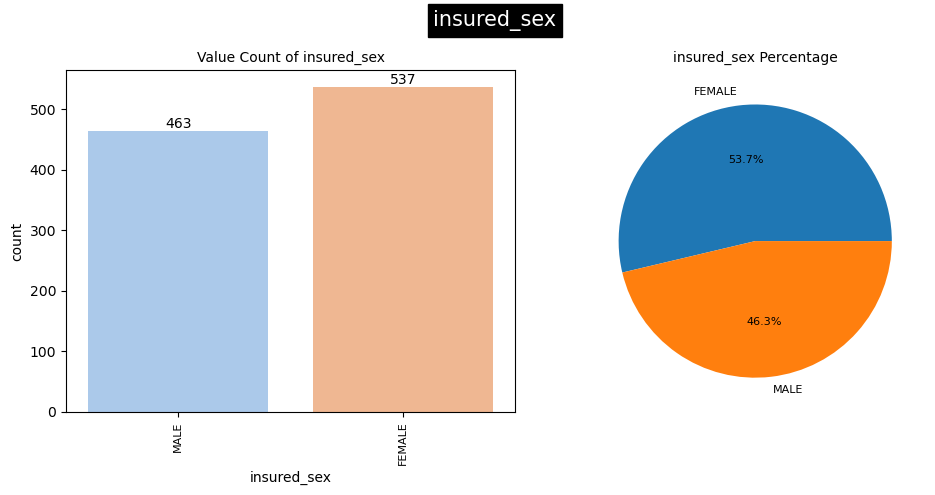

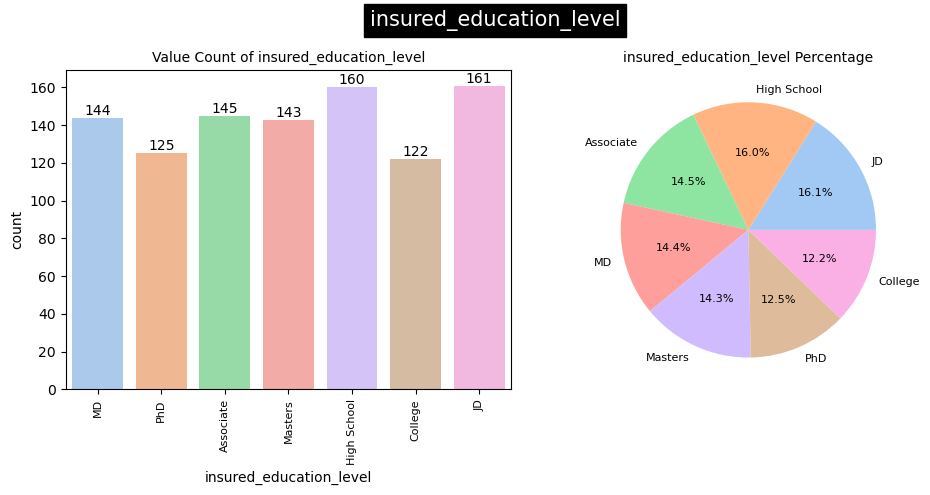

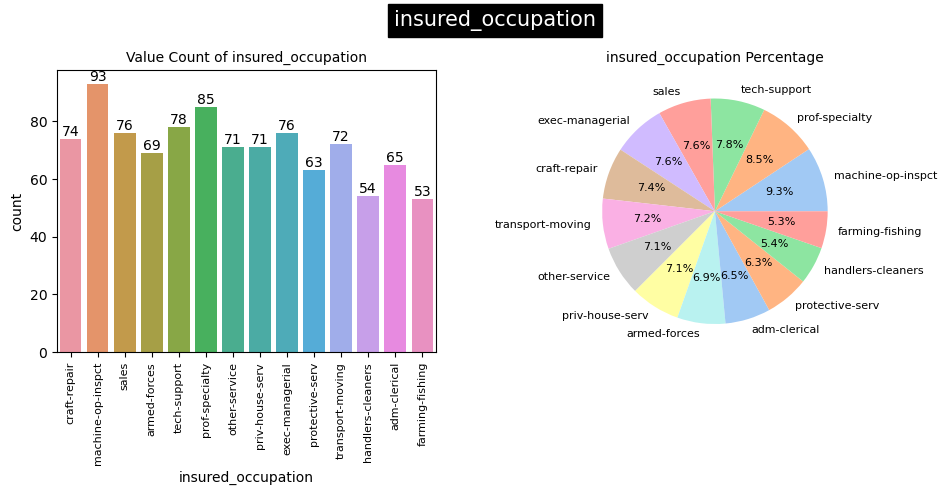

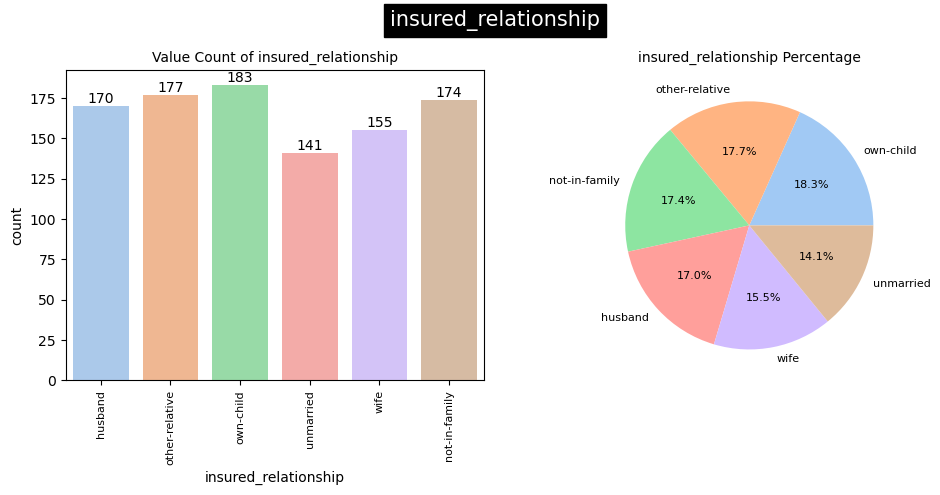

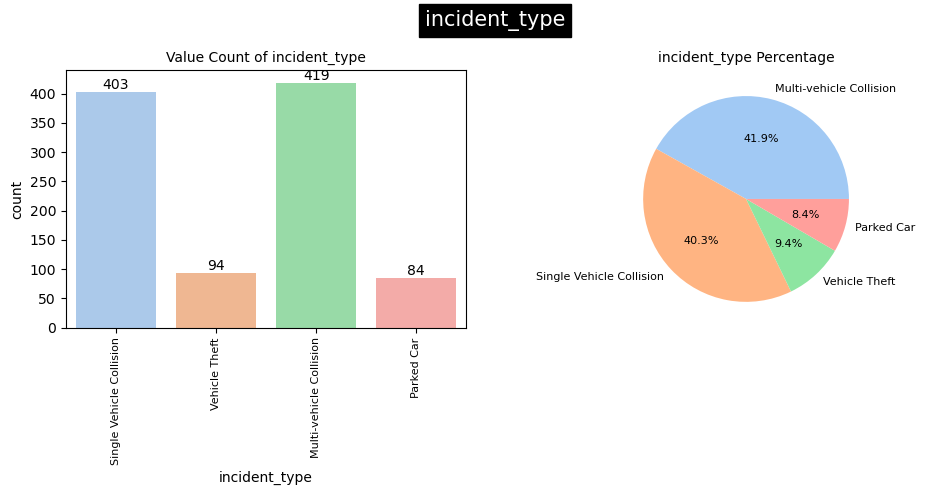

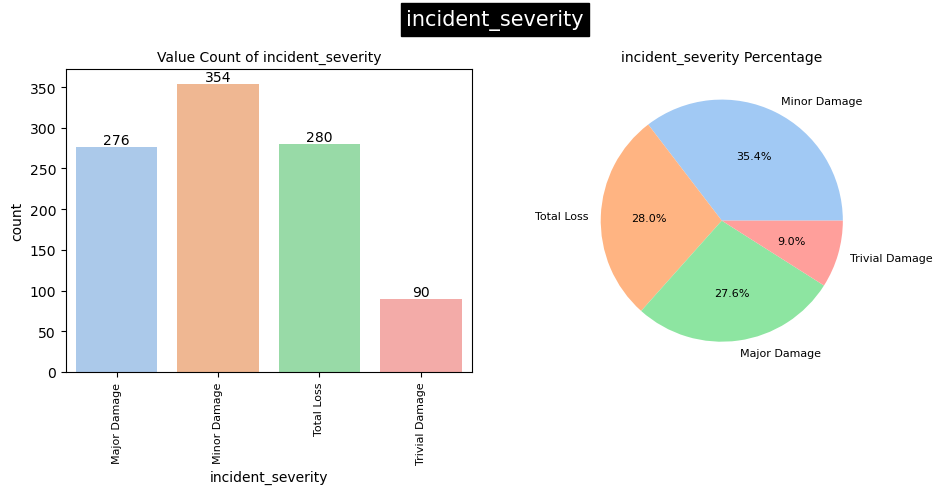

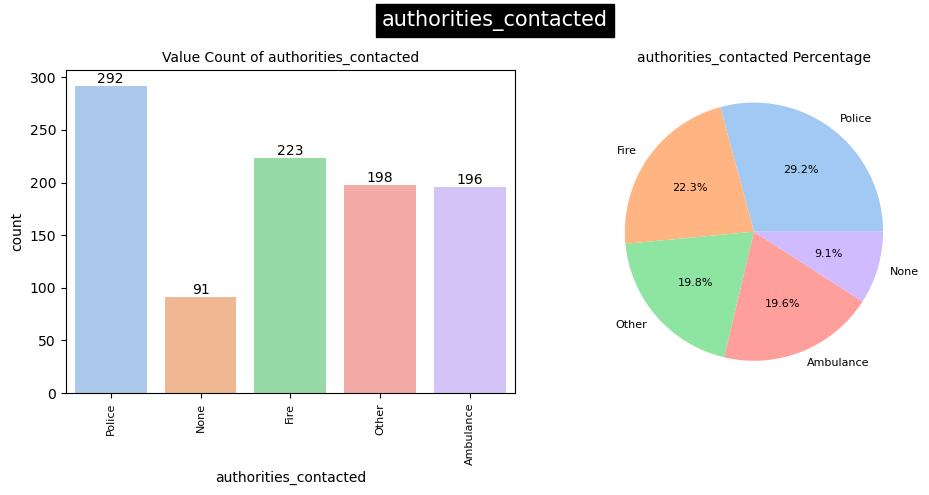

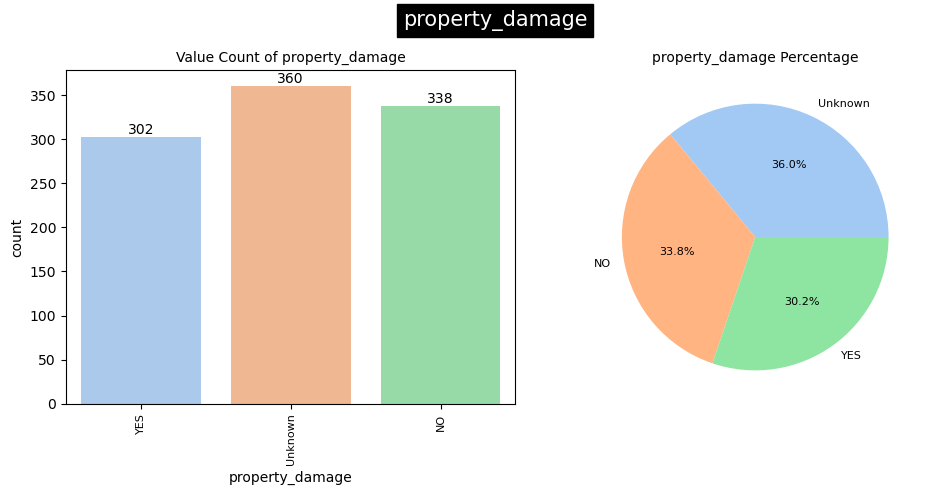

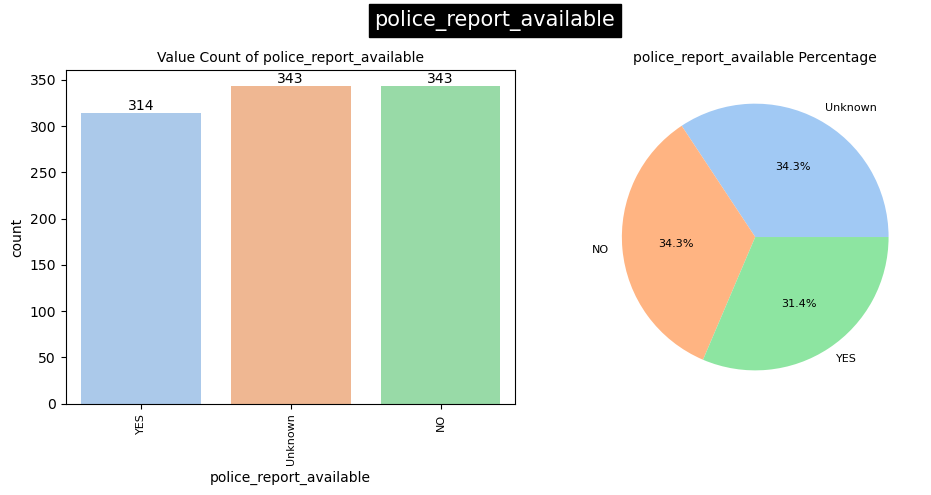

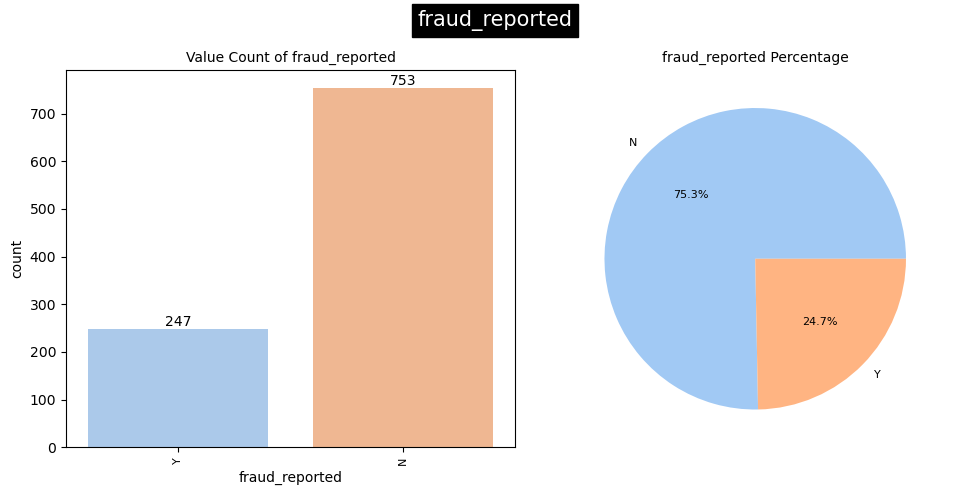

In [32]:
#Iterate over Categorical column
for i, column in enumerate(categorical_columns):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("pastel")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', textprops={'fontsize': 8})
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

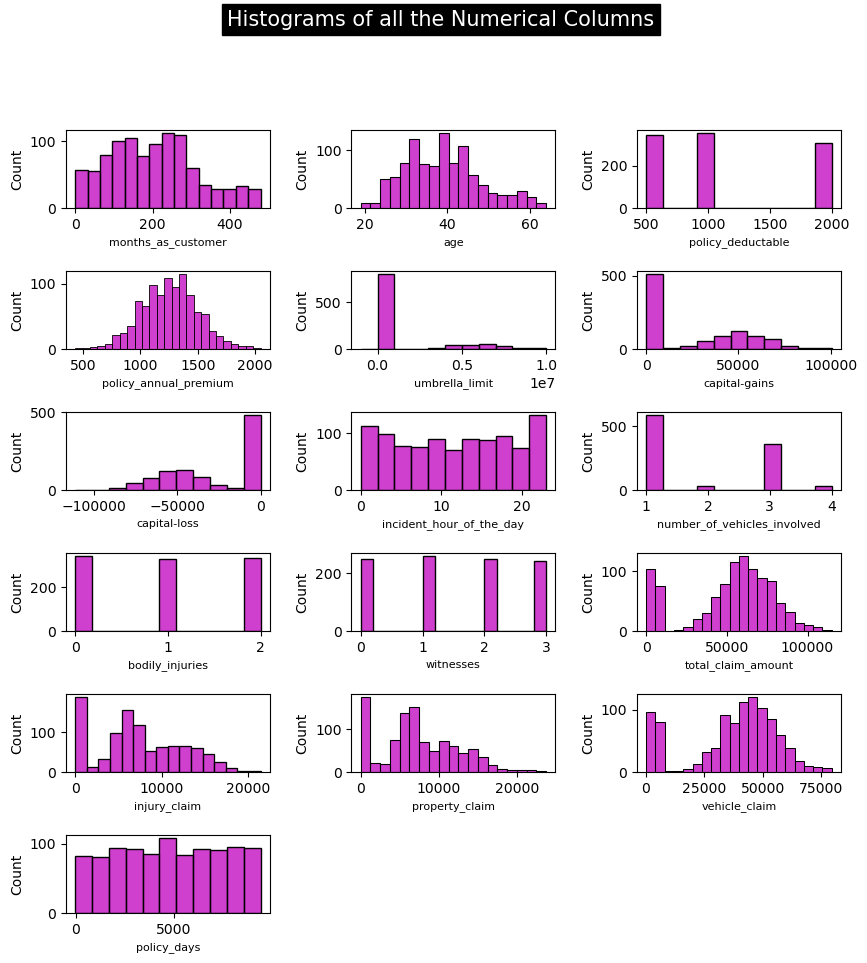

In [38]:
#Visiualizing it using Histogram
plt.figure(figsize=(10,12), facecolor='white')
# Initialize plotnumber for subplot
plotnumber = 1

# Loop through numerical columns and plot histograms
for column in numerical_columns:
    if plotnumber <= 21:
        ax = plt.subplot(7, 3, plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column, fontsize=8)
    plotnumber += 1

plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black', color='white')
plt.show()


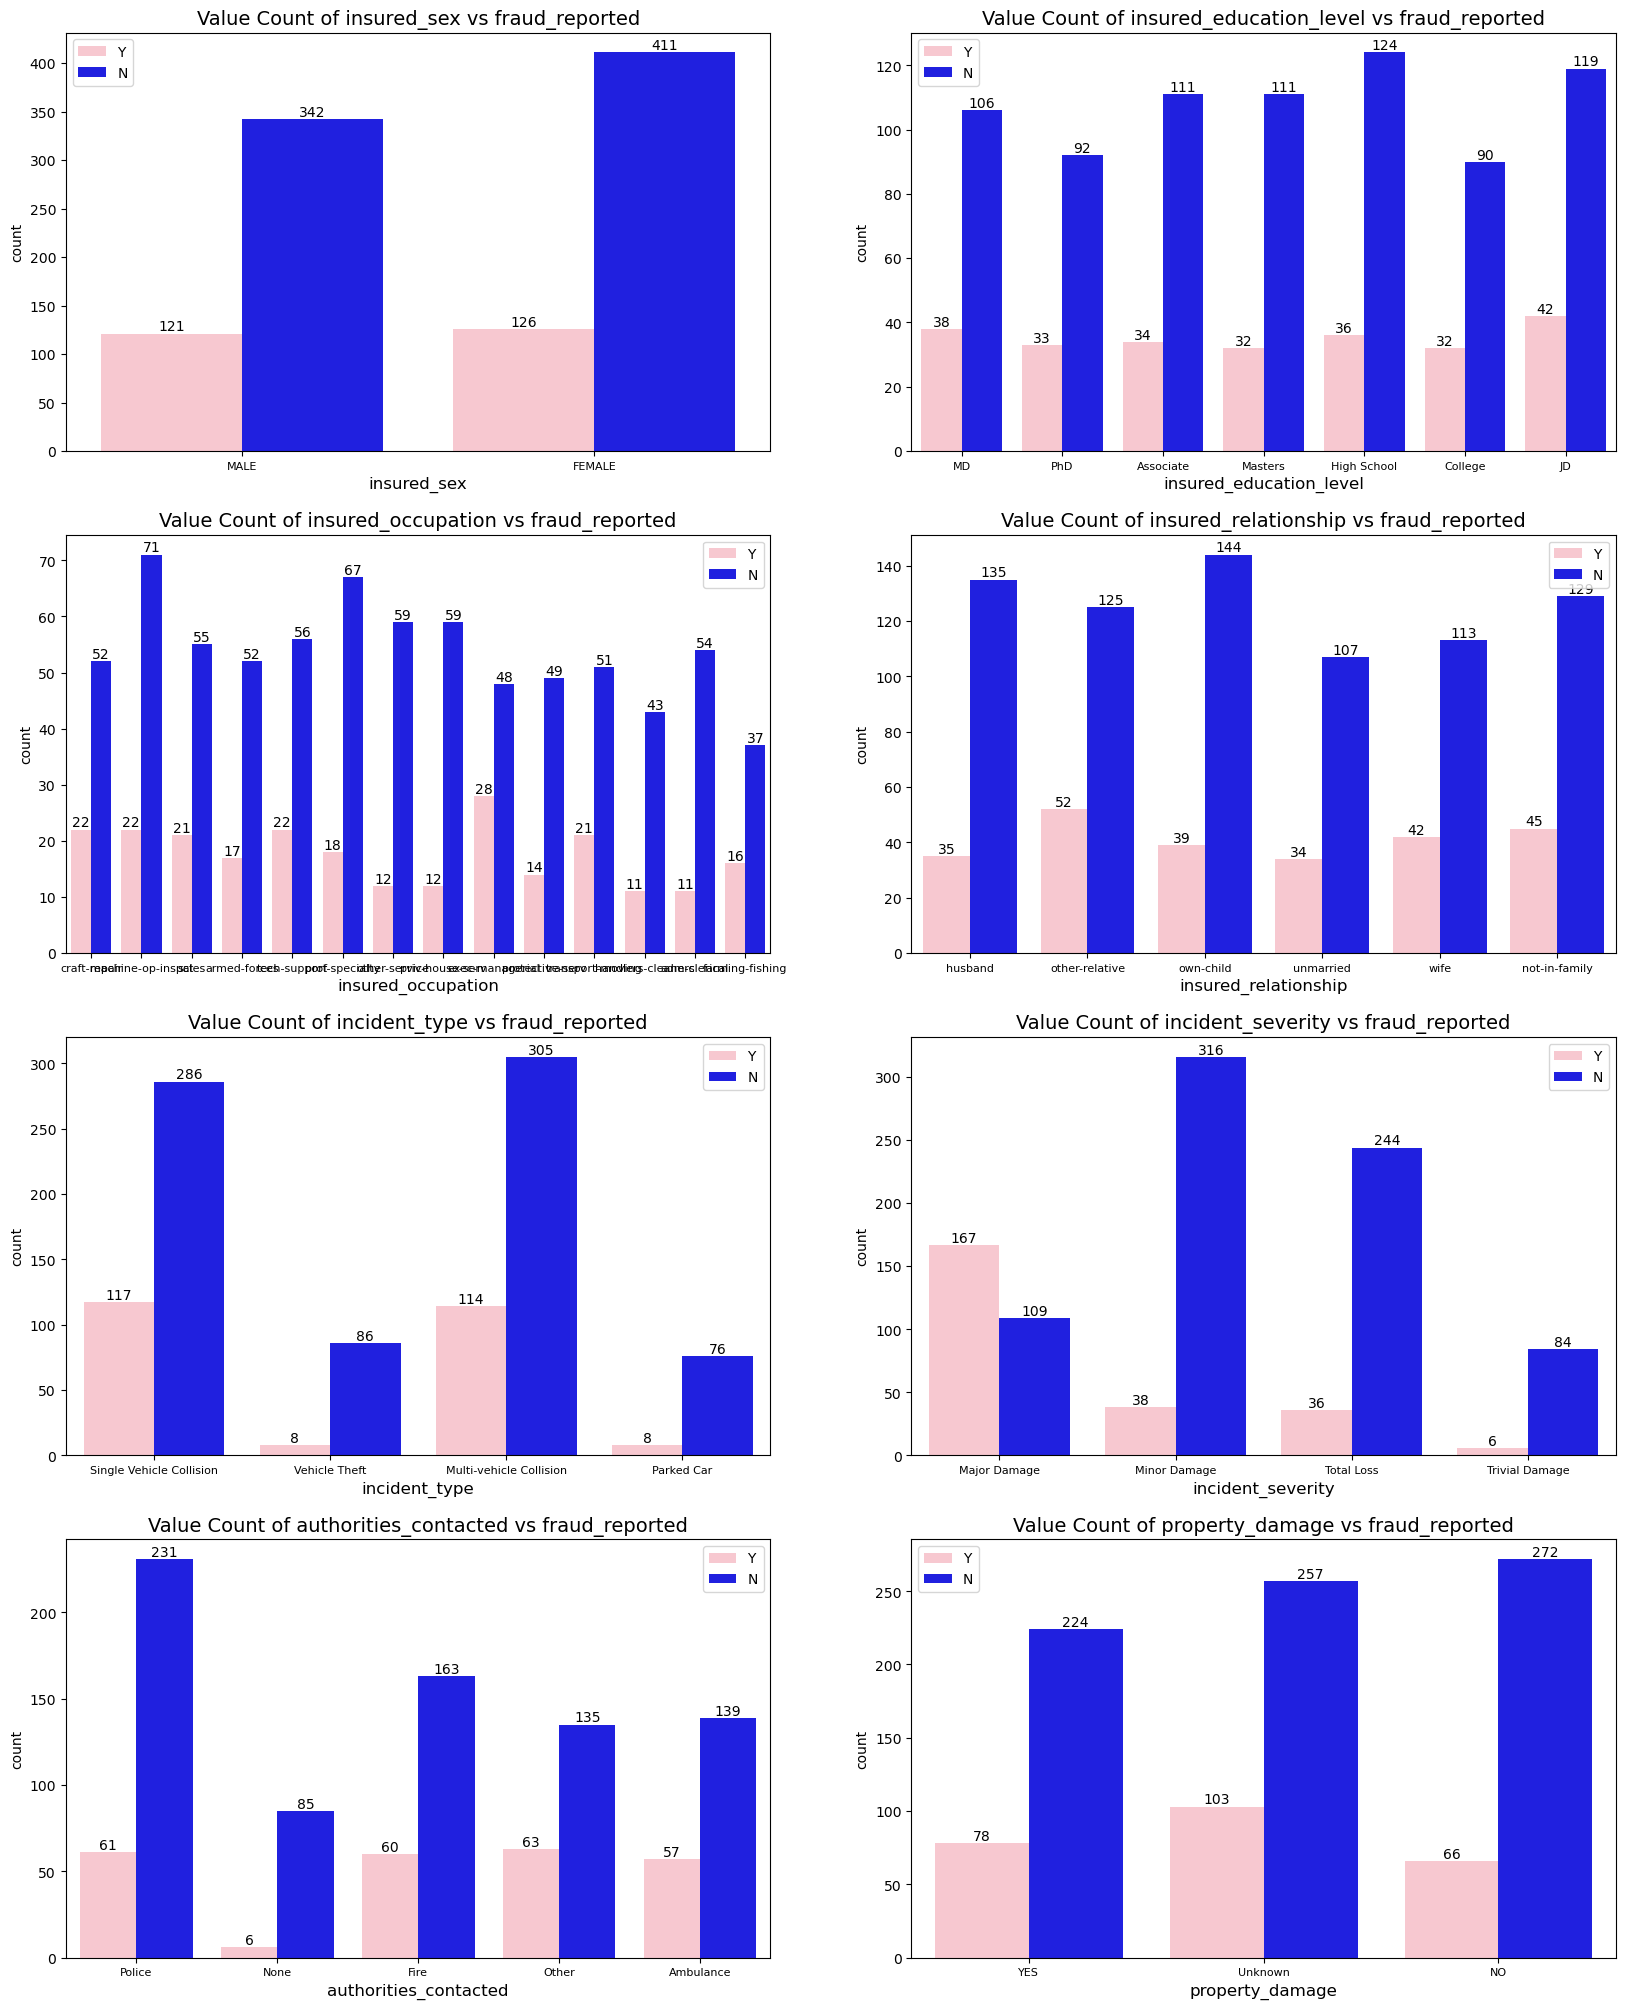

In [39]:
# Dropping our target column our categorical column
cat_col= categorical_columns.drop('fraud_reported')
# Visualization of Categorical column Vs fraud_reported
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=8:
        plt.subplot(4,2,p)
        custom_palette = {"Y": "pink", "N": "blue"} ## Define a custom color palette
        ax= sns.countplot(x=i, hue='fraud_reported',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs fraud_reported', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

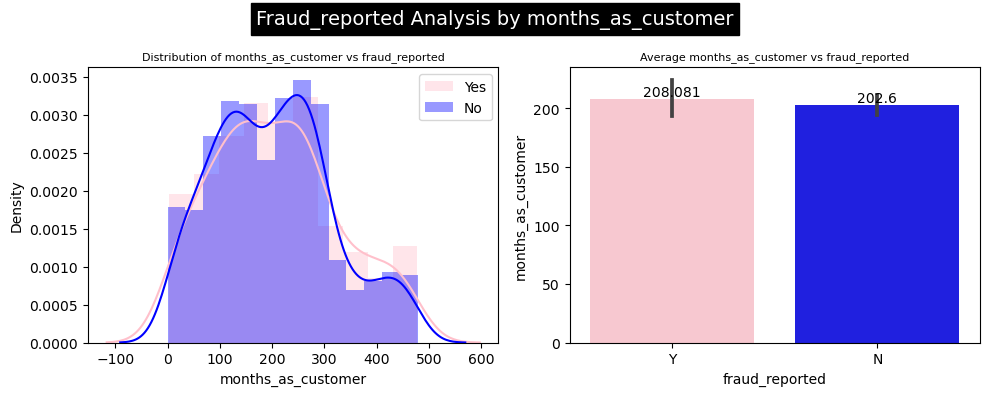

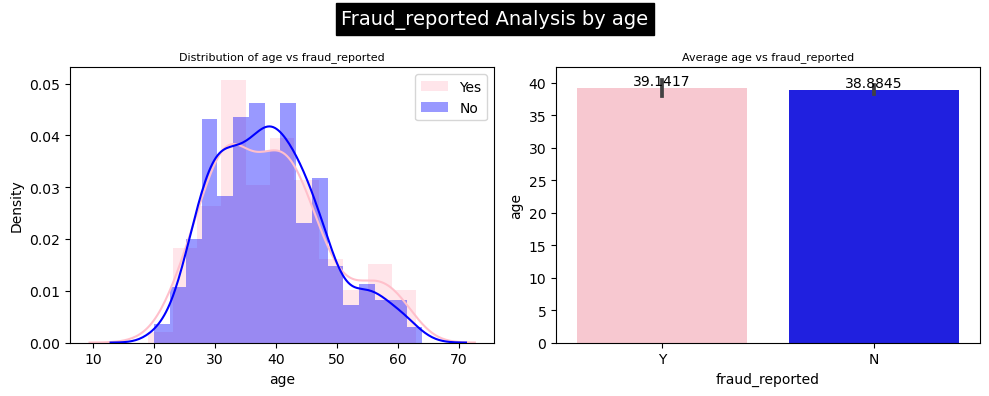

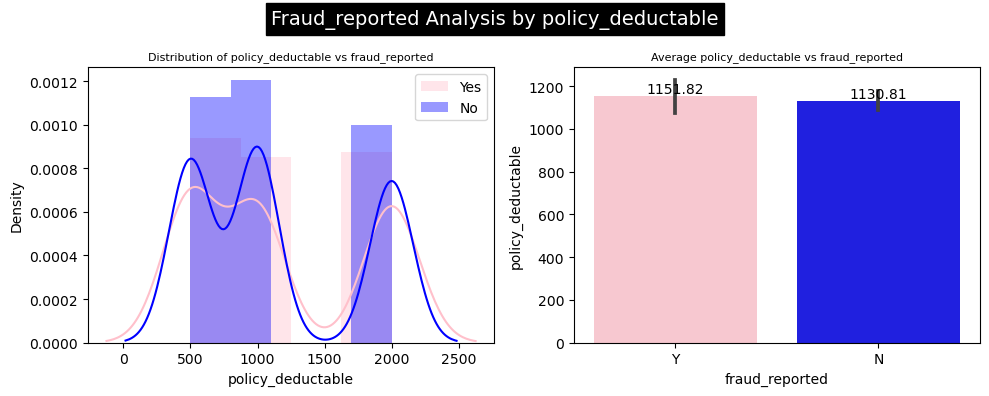

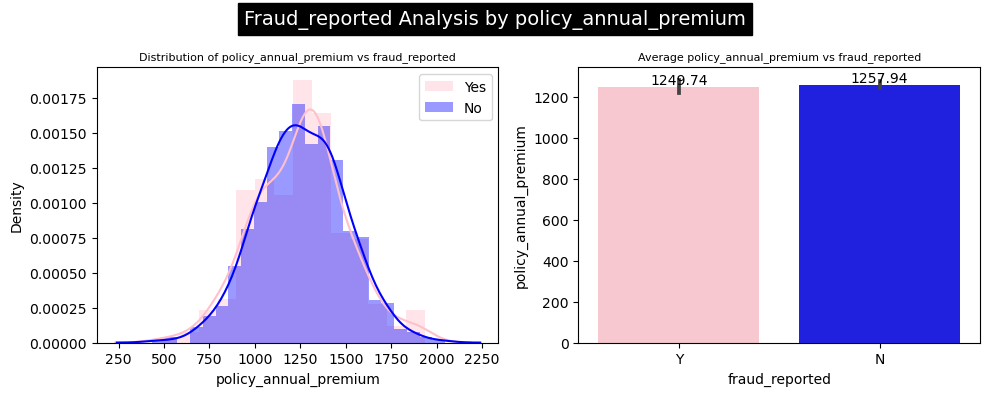

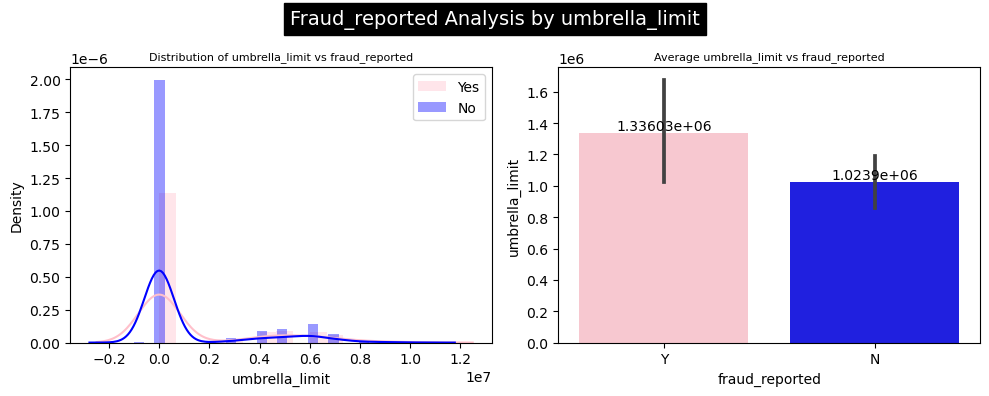

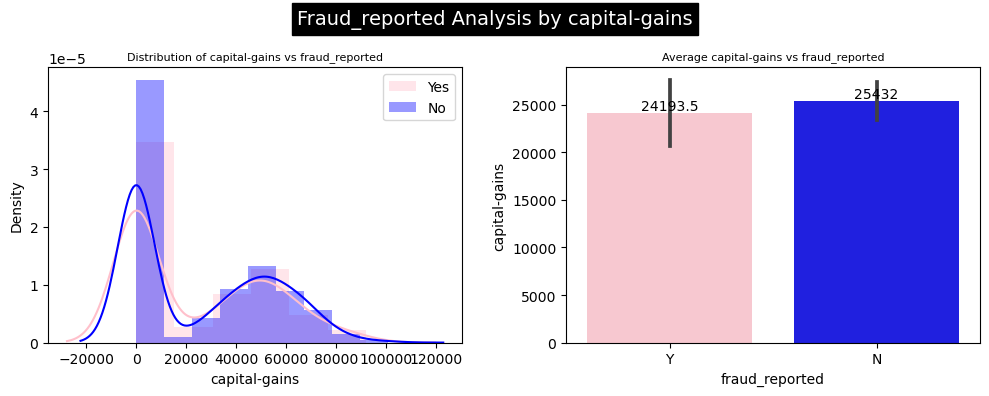

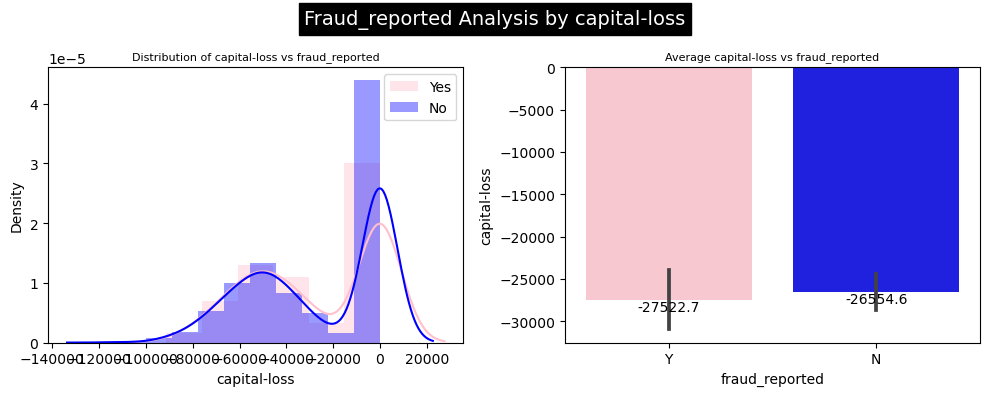

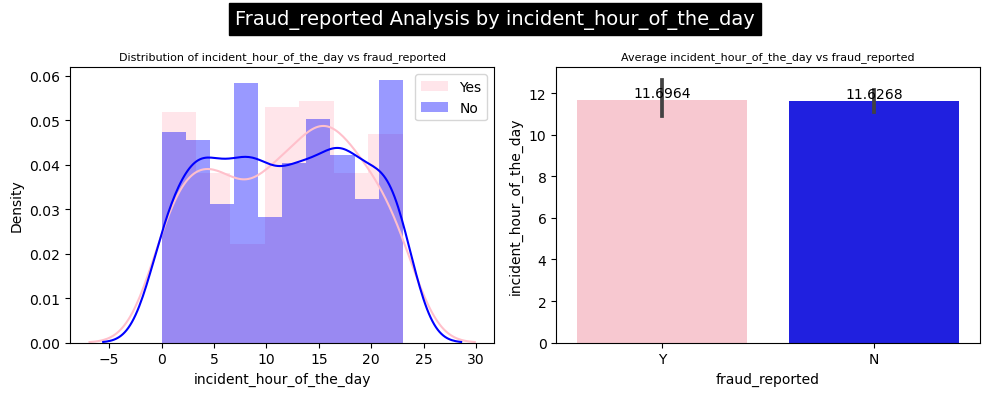

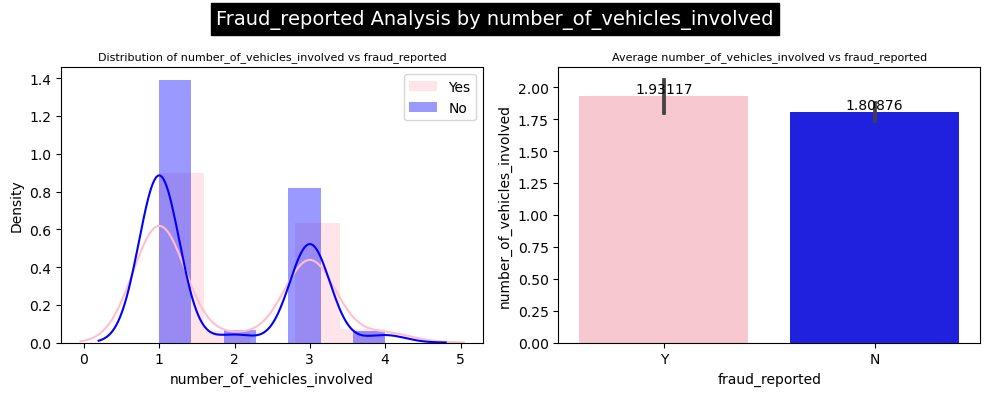

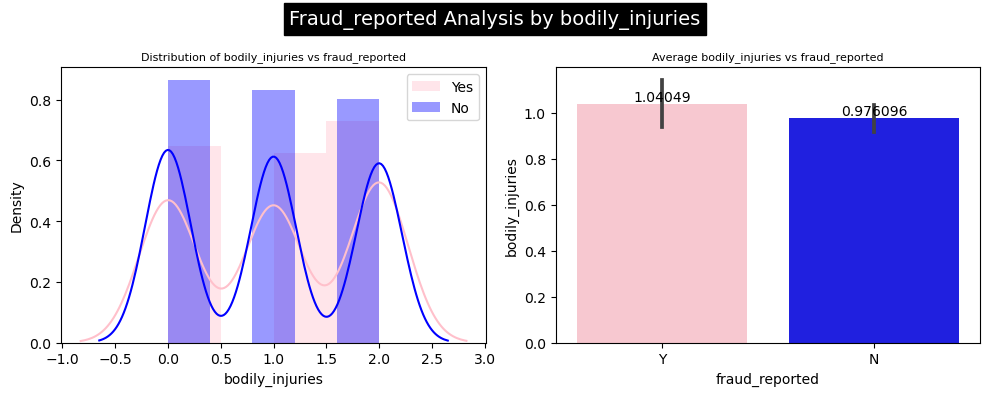

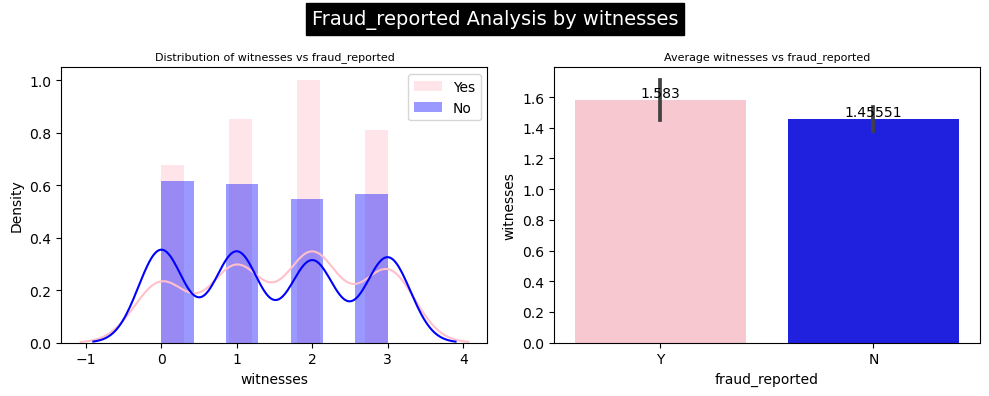

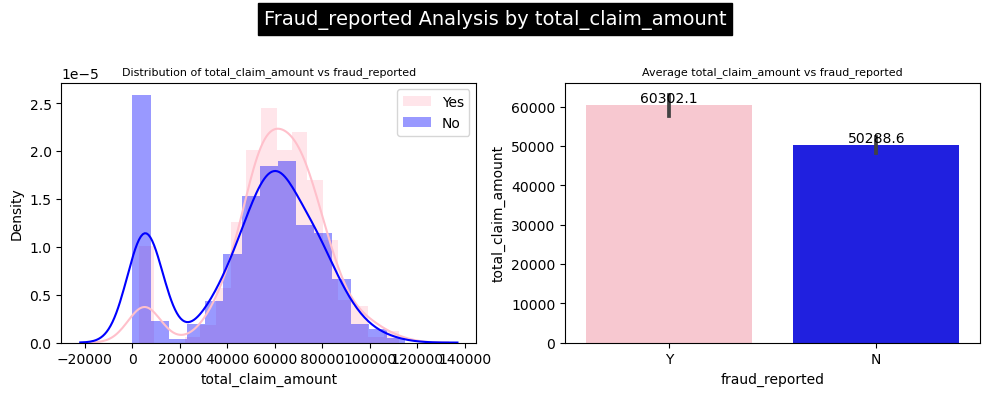

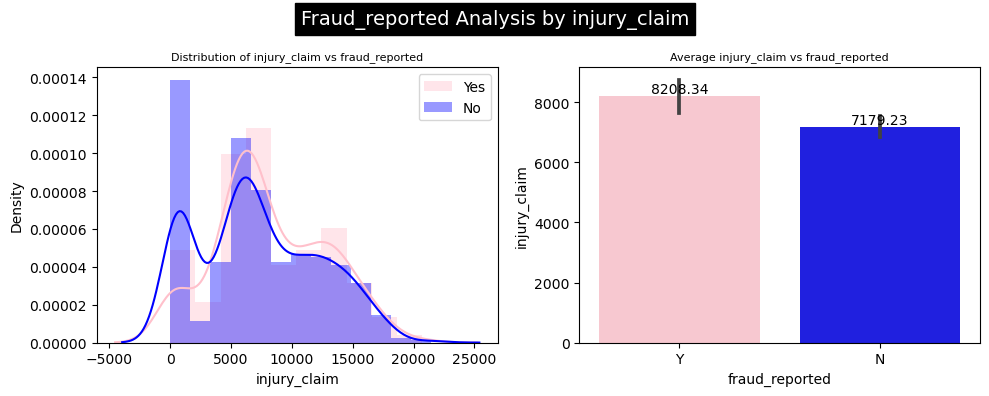

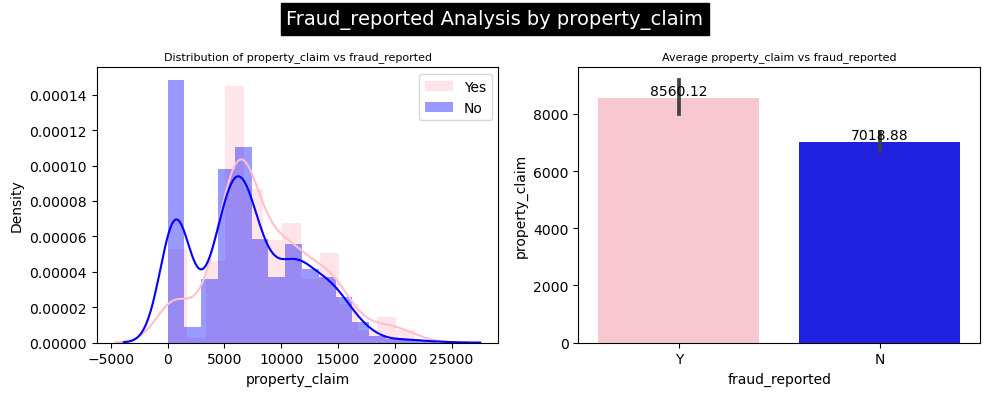

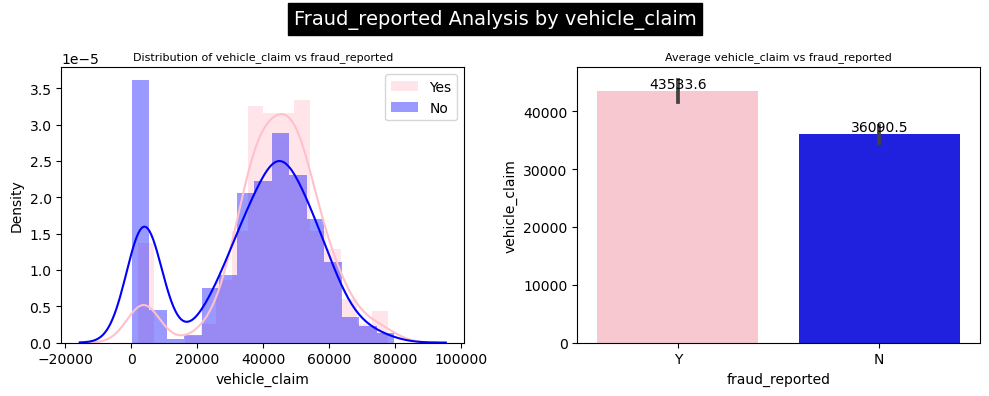

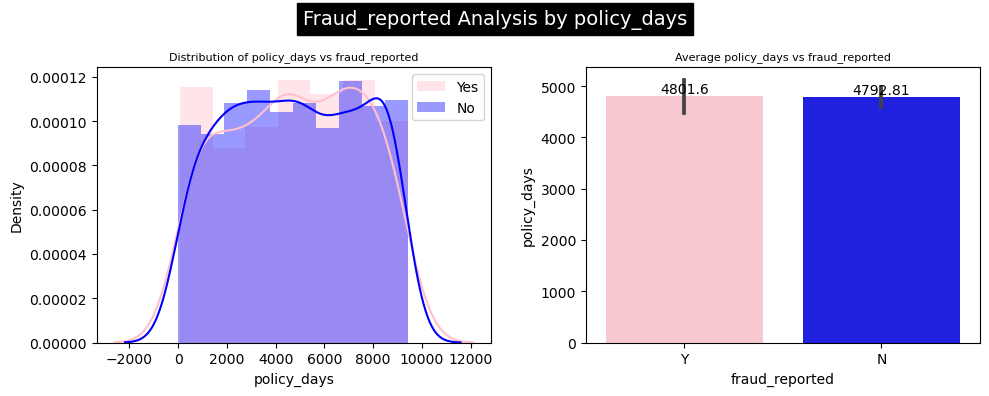

In [40]:
# Visualizing it:
for i in numerical_columns:
    
    #create Subplots
    fig, axes =plt.subplots(1,2,figsize=(10,4))
    
    # First Plot: Distribution of Numerical columns vs fraud_reported
    sns.distplot(df[df['fraud_reported']=="Y"][i], label= "Yes", color='pink', ax=axes[0])
    sns.distplot(df[df['fraud_reported']=="N"][i],label="No", color='blue', ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs fraud_reported", fontsize=8)
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs fraud_reported
    ax=sns.barplot(x='fraud_reported', y=i, data=df, palette={"Y": "pink", "N": "blue"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs fraud_reported',fontsize=8)
    
    fig.suptitle(f"Fraud_reported Analysis by {i}", fontsize=14, backgroundcolor='black',color='white')  # Add a specific title for this column
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

# SKEWNESS

In [33]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004471
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
collision_type_encoded        -0.193345
policy_days                   -0.042868
dtype: float64

THE DATA IS PROPERLY SKEWED AND THERE IS NO NEED OF FUTHER REMOVING SKEWNESS

# DETECTING AND REMOVING OUTLIERS IN DATA

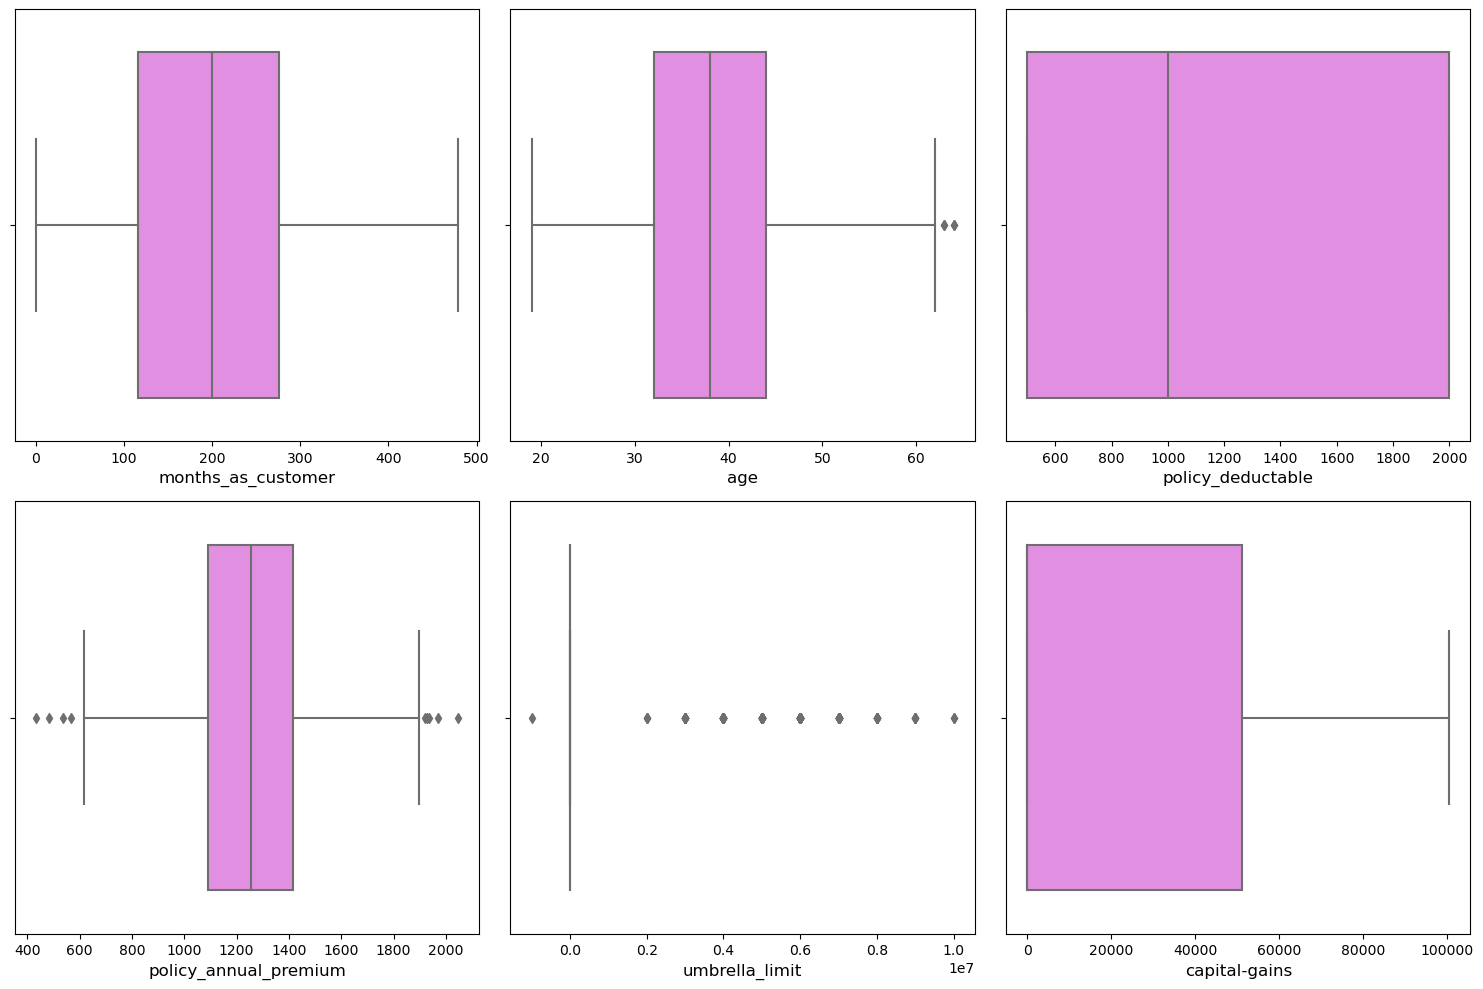

In [34]:
# Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(15,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x=col, data=df,color='violet')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [35]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(980, 27)

In [36]:
df2 = df.copy()
Q1 = df2.quantile(0)
Q3= df2.quantile(0.85)
IQR = Q3 - Q1

data = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(1000, 27)

CLEARLY USING IQR METHOD TO REMOVE SKEWNESS THERE IS ZERO LOSS IN DATA THUS IT IS THE PREFERD ONE

In [37]:
df=df2

In [38]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,collision_type_encoded,policy_days
0,328,48,1000,1406,0,MALE,MD,craft-repair,husband,53300,...,1,2,YES,71610,6510,13020,52080,Y,3,100
1,228,42,2000,1197,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,0,0,Unknown,5070,780,780,3510,Y,0,3130
2,134,29,2000,1413,5000000,FEMALE,PhD,sales,own-child,35100,...,2,3,NO,34650,7700,3850,23100,N,2,5371
3,256,41,2000,1415,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,2,NO,63400,6340,6340,50720,Y,1,9260
4,228,44,1000,1583,6000000,MALE,Associate,sales,unmarried,66000,...,0,1,NO,6500,1300,650,4550,N,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310,0,FEMALE,Masters,craft-repair,unmarried,0,...,0,1,Unknown,87200,17440,8720,61040,N,1,8622
996,285,41,1000,1436,0,FEMALE,PhD,prof-specialty,wife,70900,...,2,3,Unknown,108480,18080,18080,72320,N,2,268
997,130,34,500,1383,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,2,3,YES,67500,7500,7500,52500,N,3,4358
998,458,62,2000,1356,5000000,MALE,Associate,handlers-cleaners,wife,0,...,0,1,YES,46980,5220,5220,36540,N,2,1196


# LABEL ENCODING DATA

In [39]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,collision_type_encoded,policy_days
0,328,48,1000,1406,0,1,4,2,0,53300,...,1,2,2,71610,6510,13020,52080,1,3,100
1,228,42,2000,1197,5000000,1,4,6,2,0,...,0,0,1,5070,780,780,3510,1,0,3130
2,134,29,2000,1413,5000000,0,6,11,3,35100,...,2,3,0,34650,7700,3850,23100,0,2,5371
3,256,41,2000,1415,6000000,0,6,1,4,48900,...,1,2,0,63400,6340,6340,50720,1,1,9260
4,228,44,1000,1583,6000000,1,0,11,4,66000,...,0,1,0,6500,1300,650,4550,0,0,256


# CORRELATION OF DATA

In [40]:
df_corr= df.corr()

In [41]:
df_corr

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,collision_type_encoded,policy_days
months_as_customer,1.000000,0.922098,0.026807,0.005048,0.015498,0.060925,-0.000833,0.009814,0.069727,0.006399,...,-0.010162,0.058383,-0.055712,0.062108,0.065329,0.034940,0.061013,0.020544,-0.017824,0.048603
age,0.922098,1.000000,0.029188,0.014415,0.018126,0.073337,0.000969,0.017220,0.074832,-0.007075,...,-0.015679,0.052359,-0.049797,0.069863,0.075522,0.060898,0.062588,0.012143,-0.018672,0.037404
policy_deductable,0.026807,0.029188,1.000000,-0.003176,0.010870,-0.009733,0.015217,-0.046733,-0.022945,0.035212,...,-0.022765,0.066639,0.035213,0.022839,0.039107,0.064792,0.005269,0.014817,-0.033182,0.051034
policy_annual_premium,0.005048,0.014415,-0.003176,1.000000,-0.006334,0.038868,-0.019737,0.035970,0.001969,-0.013702,...,0.026778,0.002348,0.024185,0.009097,-0.017598,-0.011674,0.020247,-0.014500,0.036695,0.001021
umbrella_limit,0.015498,0.018126,0.010870,-0.006334,1.000000,0.010688,-0.019357,0.023422,0.077495,-0.047268,...,0.022743,-0.006738,-0.021005,-0.040344,-0.045412,-0.023790,-0.038584,0.058622,-0.025913,-0.046619
insured_sex,0.060925,0.073337,-0.009733,0.038868,0.010688,1.000000,0.009002,-0.006160,0.002855,-0.020494,...,-0.020297,0.042463,-0.008846,-0.023727,0.000924,-0.014868,-0.029609,0.030873,-0.023310,0.033667
insured_education_level,-0.000833,0.000969,0.015217,-0.019737,-0.019357,0.009002,1.000000,-0.020298,-0.023488,0.039912,...,-0.012072,0.019211,0.052622,0.074226,0.081880,0.055794,0.068348,0.008808,0.026390,-0.016159
insured_occupation,0.009814,0.017220,-0.046733,0.035970,0.023422,-0.006160,-0.020298,1.000000,-0.010171,-0.007824,...,-0.000236,-0.014794,-0.032288,0.003692,0.020211,0.003004,-0.000829,0.001564,0.006111,0.026668
insured_relationship,0.069727,0.074832,-0.022945,0.001969,0.077495,0.002855,-0.023488,-0.010171,1.000000,-0.019439,...,-0.001214,0.002362,-0.005831,0.002229,0.029014,0.007332,-0.006256,0.021043,-0.011787,0.006257
capital-gains,0.006399,-0.007075,0.035212,-0.013702,-0.047268,-0.020494,0.039912,-0.007824,-0.019439,1.000000,...,0.055829,-0.017651,-0.010004,0.015980,0.025934,-0.000779,0.015836,-0.019173,0.019785,-0.039587


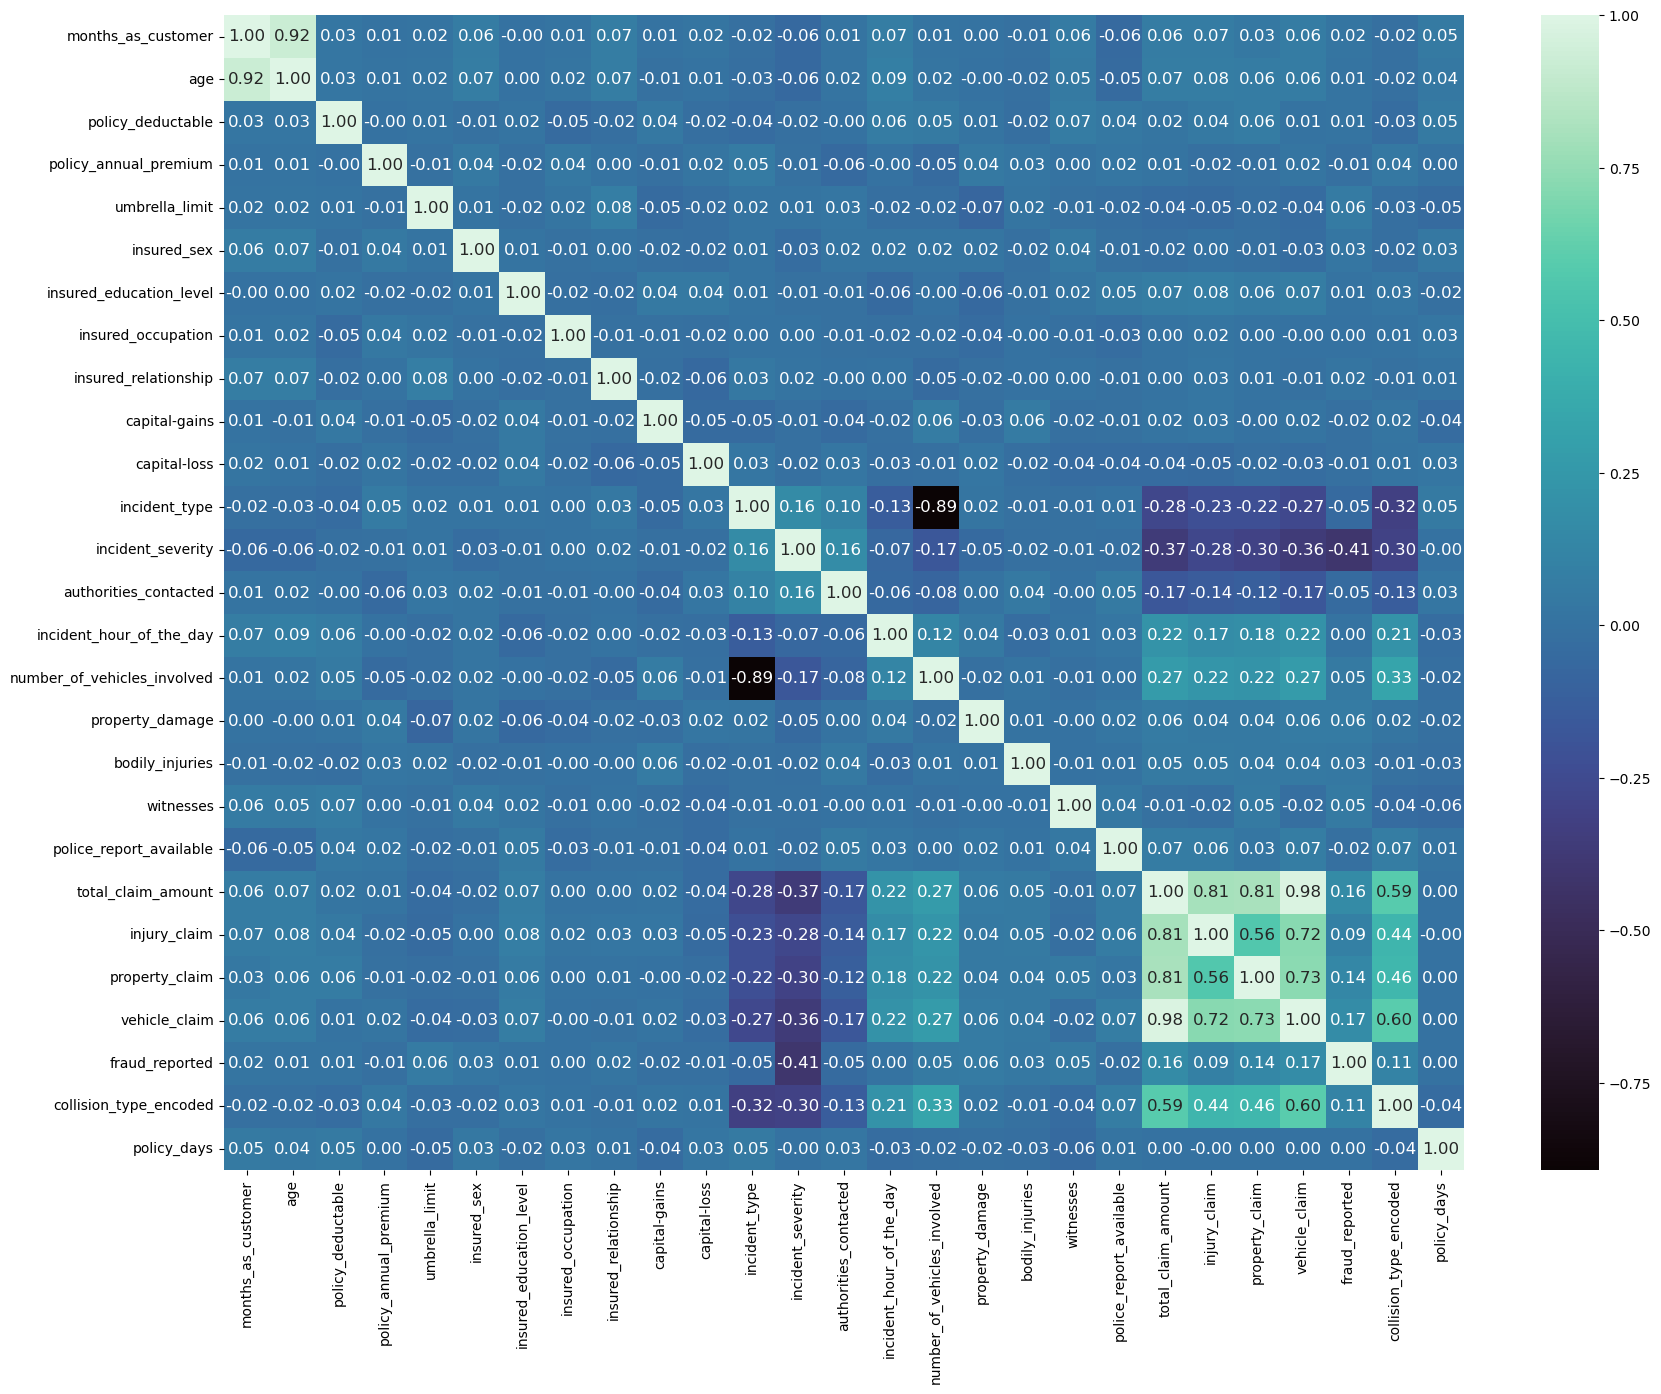

In [42]:
# Visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 12})
plt.show()

In [43]:
# Find the columns with the maximum correlation
max_corr = 0
max_corr_cols = []
for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > max_corr:
            max_corr = abs(df_corr.iloc[i, j])
            max_corr_cols = [df_corr.columns[i], df_corr.columns[j]]

print(f"Columns with maximum correlation: {max_corr_cols} with correlation value of {max_corr}")

Columns with maximum correlation: ['vehicle_claim', 'total_claim_amount'] with correlation value of 0.9827731790805576


In [44]:
df.corr().abs().unstack().sort_values(ascending=False)

months_as_customer        months_as_customer          1.000000
incident_hour_of_the_day  incident_hour_of_the_day    1.000000
policy_annual_premium     policy_annual_premium       1.000000
umbrella_limit            umbrella_limit              1.000000
insured_sex               insured_sex                 1.000000
                                                        ...   
policy_days               property_claim              0.000367
insured_occupation        bodily_injuries             0.000236
bodily_injuries           insured_occupation          0.000236
policy_days               total_claim_amount          0.000133
total_claim_amount        policy_days                 0.000133
Length: 729, dtype: float64

CORRELATION WITH TARGET VARIABLE FRAUD REPORTED

In [45]:
#correlation with target column
correlation_with_fraud_reported = df.corr()['fraud_reported'].abs().sort_values(ascending=False)
print(correlation_with_fraud_reported)

fraud_reported                 1.000000
incident_severity              0.405988
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type_encoded         0.110130
injury_claim                   0.090975
property_damage                0.060616
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_type                  0.050376
witnesses                      0.049497
authorities_contacted          0.045802
bodily_injuries                0.033877
insured_sex                    0.030873
insured_relationship           0.021043
months_as_customer             0.020544
police_report_available        0.019571
capital-gains                  0.019173
capital-loss                   0.014863
policy_deductable              0.014817
policy_annual_premium          0.014500
age                            0.012143
insured_education_level        0.008808
incident_hour_of_the_day       0.004316


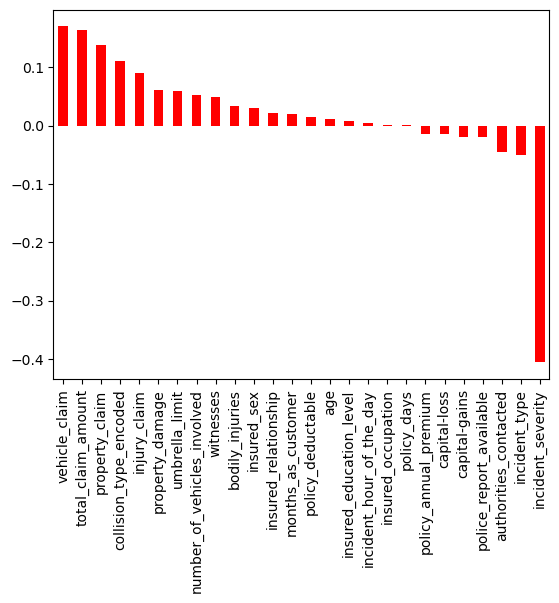

In [47]:
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar', color='red')
plt.show()

In [48]:
df.drop(columns = ['insured_education_level','incident_hour_of_the_day','insured_occupation','policy_days' ],axis=1,inplace=True)

THE ABOVE COLUMN ['insured_education_level','incident_hour_of_the_day','insured_occupation','policy_days' ] ARE REMOVED AS THEY HAD VERY LESS REALATION WITH THE TARGET VARIABLE TO DETECT AND PREDICT FUTURE FRAUD IN INSUARANCE

In [49]:
df.shape

(1000, 23)

# SPLITTING THE DATA FOR MODELLING

In [50]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

# Checking the dimenstion of X & Y
X.shape, Y.shape   


((1000, 22), (1000,))

# STANDARDISATION OF DATA

In [51]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
X = pd.DataFrame(X_scale, columns=X.columns)
X

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_relationship,capital-gains,capital-loss,incident_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,collision_type_encoded
0,1.078140,0.990836,-0.222383,0.615044,-0.479476,1.076953,-1.437957,1.011331,0.953851,0.766005,...,-0.823865,1.296313,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,1.254675
1,0.208995,0.334073,1.412784,-0.241432,1.697980,1.076953,-0.247595,-0.901927,0.953851,1.691132,...,-0.823865,0.045046,-1.210174,-1.338700,0.035801,-1.807312,-1.363822,-1.372696,-1.823346,-1.566933
2,-0.608002,-1.088913,1.412784,0.643730,1.697980,-0.928546,0.347586,0.358023,0.953851,-1.084249,...,1.140056,-1.206222,1.229693,1.362107,-1.198712,-0.686362,0.054644,-0.736072,-0.785565,0.314139
3,0.452355,0.224613,1.412784,0.651926,2.133471,-0.928546,0.942766,0.853388,-1.267577,0.766005,...,-0.823865,0.045046,0.009759,0.461838,-1.198712,0.403135,-0.224130,-0.219722,0.677607,-0.626397
4,0.208995,0.552994,-0.222383,1.340386,2.133471,1.076953,0.942766,1.467210,-0.683741,1.691132,...,-0.823865,-1.206222,-1.210174,-0.438431,-1.198712,-1.753121,-1.257232,-1.399654,-1.768252,-1.566933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.221639,-0.479476,-0.928546,0.942766,-0.901927,0.953851,0.766005,...,-0.823865,1.296313,-1.210174,-0.438431,0.035801,1.305049,2.051155,0.273817,1.224309,-0.626397
996,0.704407,0.224613,-0.222383,0.737984,-0.479476,-0.928546,1.537947,1.643100,0.953851,0.766005,...,-0.823865,1.296313,1.229693,1.362107,0.035801,2.111466,2.182342,2.214794,1.821868,0.314139
997,-0.642767,-0.541611,-1.039966,0.520791,0.826998,-0.928546,-0.247595,0.358023,0.953851,-1.084249,...,1.140056,0.045046,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.254675
998,2.208028,2.523284,1.412784,0.410146,1.697980,1.076953,1.537947,-0.901927,0.953851,0.766005,...,-0.823865,0.045046,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,0.314139


# MULTICOLLINEARITY

In [52]:
vi = pd.DataFrame()
vi["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vi["Features"] = X.columns
vi


,VIF values,Features
0,6.780925,months_as_customer
1,6.796189,age
2,1.025997,policy_deductable
3,1.019606,policy_annual_premium
4,1.018788,umbrella_limit
5,1.019276,insured_sex
6,1.022420,insured_relationship
7,1.018702,capital-gains
8,1.020608,capital-loss
9,5.040857,incident_type


# CHECKING FOR DATA IMBALANCE AND BALANCING THE DATA

In [53]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [54]:
sm= SMOTE()
X,Y= sm.fit_resample(X,Y)
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# MODEL SELECTION FOR PREDICTING FRAUD

In [55]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (XGB_model, "XGBClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]


In [56]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X, Y, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 93
Accuracy: 0.8008849557522124
Precision: 0.8013868813022335
Recall: 0.8008849557522124
F1-Score: 0.8008849557522124
Support: 452.0
Confusion Matrix:
[[181  41]
 [ 49 181]]
Cross-Validation Score: 0.7616224065477107
Model: Decision Tree Classifier
Best Random State: 4
Accuracy: 0.827433628318584
Precision: 0.8288027757202449
Recall: 0.827433628318584
F1-Score: 0.8275350365407627
Support: 452.0
Confusion Matrix:
[[192  45]
 [ 33 182]]
Cross-Validation Score: 0.7962377065411103
Model: K-Neighbors Classifier
Best Random State: 89
Accuracy: 0.7721238938053098
Precision: 0.7968905468538934
Recall: 0.7721238938053098
F1-Score: 0.7629590164993707
Support: 452.0
Confusion Matrix:
[[120  87]
 [ 16 229]]
Cross-Validation Score: 0.7324195287232405
Model: Random Forest Classifier
Best Random State: 8
Accuracy: 0.8938053097345132
Precision: 0.8938053097345132
Recall: 0.8938053097345132
F1-Score: 0.8938053097345132
Support: 452.0
Confusion Matrix:
[[225

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
4,ExtraTrees Classifier,15,0.918142,0.918275,0.918142,0.918095,452.0,"[[[196, 21], [16, 219]]]",0.899118
6,XGBClassifier,8,0.896018,0.896448,0.896018,0.896123,452.0,"[[[223, 26], [21, 182]]]",0.846078
3,Random Forest Classifier,8,0.893805,0.893805,0.893805,0.893805,452.0,"[[[225, 24], [24, 179]]]",0.870604
9,AdaBoostClassifier,80,0.891593,0.891611,0.891593,0.891598,452.0,"[[[197, 24], [25, 206]]]",0.832761
8,BaggingClassifier,2,0.856195,0.856596,0.856195,0.856190,452.0,"[[[194, 29], [36, 193]]]",0.861312
1,Decision Tree Classifier,4,0.827434,0.828803,0.827434,0.827535,452.0,"[[[192, 45], [33, 182]]]",0.796238
0,Logistic Regression,93,0.800885,0.801387,0.800885,0.800885,452.0,"[[[181, 41], [49, 181]]]",0.761622
5,RidgeClassifier,93,0.800885,0.800940,0.800885,0.800897,452.0,"[[[178, 44], [46, 184]]]",0.752998
2,K-Neighbors Classifier,89,0.772124,0.796891,0.772124,0.762959,452.0,"[[[120, 87], [16, 229]]]",0.732420
7,SGDClassifier,43,0.710177,0.716319,0.710177,0.708932,452.0,"[[[148, 83], [48, 173]]]",0.718477


In [57]:
model_performance_df.head(2)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
4,ExtraTrees Classifier,15,0.918142,0.918275,0.918142,0.918095,452.0,"[[[196, 21], [16, 219]]]",0.899118
6,XGBClassifier,8,0.896018,0.896448,0.896018,0.896123,452.0,"[[[223, 26], [21, 182]]]",0.846078


In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Create the ExtraTrees classifier
etc = ExtraTreesClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(etc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Update the classifier with the best hyperparameters
best_etc = grid_search.best_estimator_

# Fit the classifier on the training data
best_etc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = best_etc.predict(X_test)

# Evaluate the model
accuracy = best_etc.score(X_test, Y_test)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8938053097345132


In [61]:
# XGBoost classifier with hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBClassifier
xgb = XGBClassifier()

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters: ", best_params)
print("Best score: ", best_score)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score:  0.8501060708643647


THE BEST PERFORMING MODEL IS XGBBOOST ON THE BASIS IF ACCUARCY SCORE WHICH IS HIGHER THAN EXTRA TRESS MODEL

# SAVING THE BEST PERFORMING MODEL

In [62]:
# Save the trained model using pickle
import pickle

# Define the file path to save the model
file_path = "best_etc_model.pkl"

# Open the file to save the model
with open(file_path, 'wb') as file:
    # Write the model to the file
    pickle.dump(best_etc, file)

print("Saved the model as:", file_path)

Saved the model as: best_etc_model.pkl
